In [1]:
import torch

# 1. tensor的基本操作  
## 1.1 创建tensor

In [2]:
tensor_ept = torch.empty(5, 3)  # 创建一个未初始化的tensor

In [3]:
tensor_ept

tensor([[-1.7545e+25,  4.5555e-41, -1.7545e+25],
        [ 4.5555e-41, -1.7545e+25,  4.5555e-41],
        [-1.7545e+25,  4.5555e-41, -1.7545e+25],
        [ 4.5555e-41, -1.7576e+25,  4.5555e-41],
        [-1.7545e+25,  4.5555e-41, -1.7545e+25]])

In [4]:
tensor_rdm = torch.rand(5, 3)  # 创建一个随机初始化的tensor

In [5]:
tensor_rdm

tensor([[0.0406, 0.0515, 0.2540],
        [0.7091, 0.3406, 0.0727],
        [0.6435, 0.7606, 0.0952],
        [0.4913, 0.1347, 0.0233],
        [0.8739, 0.4126, 0.6497]])

In [6]:
tensor_zero = torch.zeros(5, 3)  # 创建一个全0的tensor

In [7]:
tensor_zero

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [8]:
tensor_from_float = torch.tensor([5.5, 3])   # 直接根据list创建tensor

In [9]:
tensor_from_float

tensor([5.5000, 3.0000])

In [10]:
tensor_new = torch.randn_like(tensor_zero, dtype=torch.float) # 创建与现有tensor size相同的新tensor, 可指定dtype

In [11]:
tensor_new

tensor([[-0.8328, -0.5674,  1.1909],
        [-0.0108, -0.7823,  0.0167],
        [ 0.5623, -0.0707, -1.1678],
        [-0.3866,  1.6267, -1.0789],
        [-0.7188, -1.8883, -1.1476]])

还有很多函数可以创建tensor，可以翻翻官网api就知道了。一般在创建tensor的时候，都可以指定数据类型dtype和存放device(cpu/gpu)

## 1.2 tensor的基本操作

### 1.2.1 tensor size   
tensor.size()和tensor.shape，都能获取tensor.Size; 它们的返回值可视为一个tuple,支持所有tuple的操作

In [12]:
tensor_rdm.size()

torch.Size([5, 3])

In [13]:
tensor_rdm.shape

torch.Size([5, 3])

In [14]:
tensor_rdm.size()[0]

5

In [15]:
tensor_rdm.size()[1]

3

### 1.2.2 算术运算

#### 1.2.2.1 加法运算  
tensor加法有3种形式:  
1. 直接相加  
2. 用torch.add(), 用torch.add()还能指定将结果输出到某个tensor  
3. inplace加法， Pytorch操作inplace版本都有后缀"_"， 如x.add_(y)

In [16]:
x = torch.ones(5,3)
y = torch.randn(5,3, dtype=torch.float)

In [17]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [18]:
y

tensor([[-0.9353, -0.6979, -0.5798],
        [-0.1747,  1.8433,  0.5609],
        [ 1.0845,  0.7375, -1.0634],
        [ 0.4117,  0.3009,  0.4417],
        [-1.0128, -0.3878, -1.6618]])

In [19]:
x + y

tensor([[ 0.0647,  0.3021,  0.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])

In [20]:
torch.add(x, y)

tensor([[ 0.0647,  0.3021,  0.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])

In [21]:
result = torch.empty(5,3)

In [22]:
torch.add(x, y, out=result)

tensor([[ 0.0647,  0.3021,  0.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])

In [23]:
result

tensor([[ 0.0647,  0.3021,  0.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])

In [24]:
x.add_(y)

tensor([[ 0.0647,  0.3021,  0.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])

In [25]:
x

tensor([[ 0.0647,  0.3021,  0.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])

减法、乘法、除法参考官网api

### 1.2.3 索引  
操作tensor与操作np.array类似，与np.array不同的是，tensor索引出来的结果与原数据共享内存单元。

In [26]:
x

tensor([[ 0.0647,  0.3021,  0.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])

In [27]:
y = x[:1, :]

In [28]:
y

tensor([[0.0647, 0.3021, 0.4202]])

In [29]:
y += 1  # 修改y, x也会变

In [30]:
y

tensor([[1.0647, 1.3021, 1.4202]])

In [31]:
x

tensor([[ 1.0647,  1.3021,  1.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])

还有一些索引高级的索引函数，参考pytorch官网api

### 1.2.4 改变形状
用view来改变tensor形状, (python的id()函数：如果两个实例的id一致，那么它们所对应的内存地址相同；反之不同)

In [32]:
y = x.view(15)
print(y)
print(y.shape)
print(id(y))
print(id(x))

tensor([ 1.0647,  1.3021,  1.4202,  0.8253,  2.8433,  1.5609,  2.0845,  1.7375,
        -0.0634,  1.4117,  1.3009,  1.4417, -0.0128,  0.6122, -0.6618])
torch.Size([15])
139628656807080
139626750739152


In [33]:
z = x.view(-1, 5)
print(z)
print(z.size())

tensor([[ 1.0647,  1.3021,  1.4202,  0.8253,  2.8433],
        [ 1.5609,  2.0845,  1.7375, -0.0634,  1.4117],
        [ 1.3009,  1.4417, -0.0128,  0.6122, -0.6618]])
torch.Size([3, 5])


**注意**：用view()来改变形状，返回的新tensor与源tensor虽然size不同，但共享data,也即其中一个改变，另一个也会跟着改变。（view只改变了对这个张量的观察角度，内部数据并未改变）,虽然新老tensor共享data，但它们是不同实例，id不一致(因为tensor除了包含data外还有一些其他属性)

In [34]:
x += 1
print(x)
print(y)

tensor([[2.0647, 2.3021, 2.4202],
        [1.8253, 3.8433, 2.5609],
        [3.0845, 2.7375, 0.9366],
        [2.4117, 2.3009, 2.4417],
        [0.9872, 1.6122, 0.3382]])
tensor([2.0647, 2.3021, 2.4202, 1.8253, 3.8433, 2.5609, 3.0845, 2.7375, 0.9366,
        2.4117, 2.3009, 2.4417, 0.9872, 1.6122, 0.3382])


如果想返回一个真正新的副本(不共享data)，推荐先用clone()创造一个副本，然后再使用view

In [35]:
x_cp = x.clone().view(15)
x -= 1
print(x)
print(x_cp)

tensor([[ 1.0647,  1.3021,  1.4202],
        [ 0.8253,  2.8433,  1.5609],
        [ 2.0845,  1.7375, -0.0634],
        [ 1.4117,  1.3009,  1.4417],
        [-0.0128,  0.6122, -0.6618]])
tensor([2.0647, 2.3021, 2.4202, 1.8253, 3.8433, 2.5609, 3.0845, 2.7375, 0.9366,
        2.4117, 2.3009, 2.4417, 0.9872, 1.6122, 0.3382])


**没看懂：** 使用clone还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源Tensor

In [36]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([1.2106])
1.2106033563613892


### 1.2.5 线性代数

函数	功能  
trace	对角线元素之和(矩阵的迹)  
diag	对角线元素  
triu/tril	矩阵的上三角/下三角，可指定偏移量  
mm/bmm	矩阵乘法，batch的矩阵乘法  
addmm/addbmm/addmv/addr/baddbmm..	矩阵运算  
t	转置  
dot/cross	内积/外积  
inverse	求逆矩阵  
svd	奇异值分解  
  
更多tensor线性代数操作，[参考官网api](https://pytorch.org/docs/stable/tensors.html#)

### 1.2.6 广播机制  
当对2个形状不同的tensor做按元素运算时，可能会触发广播(broadcasting)机制: 先适当复制元素使这2个tensor形状相同后，再按元素运算

In [37]:
x = torch.arange(1,3).view(1,2)
print(x)
y = torch.arange(1,4).view(3,1)
print(y)
print(x+y) # 将x第一行复制2次，得到(3,2)的新tensor；将y的第1列复制1次，得到(3,2)的tensor;对两个新tensor按元素相加，得到结果

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


### 1.2.7 运算的内存开销  
前面说的索引操作不会开辟新的内存空间，而像y = x + y这样的运算是会新开内存的，然后将y指向新内存。

In [38]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y = y + x
print(id(y) == id_before)

False


以下4中写法，是inplace的，不会开新内存：

In [39]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y[:] = y + x
print(id(y) == id_before)

True


In [40]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y += x
print(id(y) == id_before)

True


In [41]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
torch.add(x, y, out=y)
print(id(y) == id_before)

True


In [42]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
id_before = id(y)
y.add_(x)
print(id(y) == id_before)

True


### 1.2.8 tensor和numpy相互转换
1. tensor转numpy数组:tensor.numpy()  
2. numpy数组转tensor:torch.from_numpy()  
这两个函数所产生的tensor和numpy中的数组共享相同的内存(所以转换速度快)，改变其中一个时，另一个也会改变  
将numpy数组转成torch.tensor还有一个方法：torch.tensor()，但该方法总是会进行数据拷贝，返回的tensor和原来的数据不再共享内存

#### 1.2.8.1 tensor转numpy数组

In [43]:
a = torch.ones(5)
b = a.numpy()
print(a, b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]


In [44]:
a += 1
print(a, b)
b += 1
print(a, b)

tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


#### 1.2.8.2 numpy数组转tensor

In [45]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [46]:
a += 1
print(a, b)
b += 1
print(a, b)

[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


In [47]:
c = torch.tensor(a)
a += 1
print(a, c)

[4. 4. 4. 4. 4.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


## 1.3 tensor on GPU

### 1.3.1 使用colab学习pytorch

colab是谷歌提供的一个免费GPU服务，可以在colab上打开一个.ipynb，运行gpu代码，虽然显存有限，但足够用于学习深度学习。

**在colab中配置pytorch gpu学习环境：**  
1. 打开一个.ipynb，在代码输入框中输入并运行：  
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
2. 设置.ipynb支持GPU运算：  
修改->笔记本设置->硬件加速->GPU
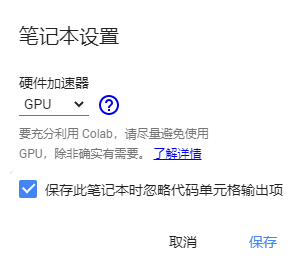

### 1.3.2 在GPU上运行pytorch

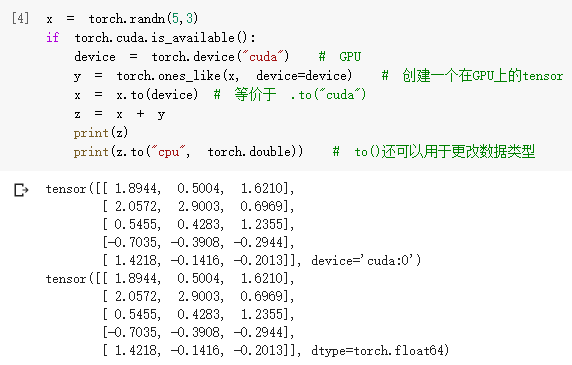